In [118]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys 
import os

# this line walks up file directory so rule-vetting is cwd
# Currently this breaks if chunk is run multiple times
os.chdir(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))))
print(os.getcwd())

import rulevetting.api.viz as viz
from rulevetting.projects.csi_pecarn.dataset import Dataset
from rulevetting.projects.csi_pecarn.tree_functions import *
from rulevetting.projects.csi_pecarn.baseline import Baseline
from rulevetting.projects.csi_pecarn.model_best import SpecialTree

from sklearn import tree
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
sns.set_style("white")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/


In [119]:
df_ran = Dataset().get_data(control_types=['ran'])


df0 = df_ran[0]
df1 = df_ran[1]
df2 = df_ran[2]

# 
# df0 = df0[(df0['NonVerbal'] == 1) & (df0['VeryYoung'] == 0)]
# df1 = df1[(df1['NonVerbal'] == 1) & (df1['VeryYoung'] == 0)]
# df2 = df2[(df2['NonVerbal'] == 1) & (df2['VeryYoung'] == 0)]

frames = [df0,df1]

data_train = pd.concat(frames)
data_test = df2

In [120]:
# SpecialTree on training+tuning

pred_train = SpecialTree().predict(data_train)
evaluate = pd.DataFrame(data = {'outcome': data_train['outcome'], 
                                'pred': pred_train})
TN = evaluate[ (evaluate['pred'] == 0) & (evaluate['outcome'] == 0)].shape[0]
TP = evaluate[ (evaluate['pred'] == 1) & (evaluate['outcome'] == 1)].shape[0]
FN = evaluate[ (evaluate['pred'] == 0) & (evaluate['outcome'] == 1)].shape[0]
FP = evaluate[ (evaluate['pred'] == 1) & (evaluate['outcome'] == 0)].shape[0]
sensitivity = TP/(FN+TP)
specificity = TN/(FP+TN)
print('sens: '+ str(sensitivity) +',spec: '+ str(specificity))

sens: 0.966542750929368,spec: 0.34355828220858897


In [121]:
SpecialTree().print_model(data_train)

'Classification summary: 581 patients labeled 1 and 177 patients labeled 0.'

In [122]:
# Baseline on training+tuning

pred_train = Baseline().predict(data_train)
evaluate = pd.DataFrame(data = {'outcome': data_train['outcome'], 
                                'pred': pred_train})
TN = evaluate[ (evaluate['pred'] == 0) & (evaluate['outcome'] == 0)].shape[0]
TP = evaluate[ (evaluate['pred'] == 1) & (evaluate['outcome'] == 1)].shape[0]
FN = evaluate[ (evaluate['pred'] == 0) & (evaluate['outcome'] == 1)].shape[0]
FP = evaluate[ (evaluate['pred'] == 1) & (evaluate['outcome'] == 0)].shape[0]
sensitivity = TP/(FN+TP)
specificity = TN/(FP+TN)
print('sens: '+ str(sensitivity) +', spec: '+ str(specificity))

sens: 0.9182156133828996, spec: 0.3987730061349693


In [123]:
sum(pred_train)

541

In [124]:
Baseline().print_model(data_train)

'Classification summary: 541 patients labeled 1 and 217 patients labeled 0.'

In [125]:
# SpecialTree on testing

pred_test = SpecialTree().predict(data_test)
evaluate = pd.DataFrame(data = {'outcome': data_test['outcome'], 
                                'pred': pred_test})
TN = evaluate[ (evaluate['pred'] == 0) & (evaluate['outcome'] == 0)].shape[0]
TP = evaluate[ (evaluate['pred'] == 1) & (evaluate['outcome'] == 1)].shape[0]
FN = evaluate[ (evaluate['pred'] == 0) & (evaluate['outcome'] == 1)].shape[0]
FP = evaluate[ (evaluate['pred'] == 1) & (evaluate['outcome'] == 0)].shape[0]
sensitivity = TP/(FN+TP)
specificity = TN/(FP+TN)
print('sens: '+ str(sensitivity) +', spec: '+ str(specificity))

sens: 0.96, spec: 0.366412213740458


In [126]:
# Baseline on testing
pred_test = Baseline().predict(data_test)
evaluate = pd.DataFrame(data = {'outcome': data_test['outcome'], 
                                'pred': pred_test})
TN = evaluate[ (evaluate['pred'] == 0) & (evaluate['outcome'] == 0)].shape[0]
TP = evaluate[ (evaluate['pred'] == 1) & (evaluate['outcome'] == 1)].shape[0]
FN = evaluate[ (evaluate['pred'] == 0) & (evaluate['outcome'] == 1)].shape[0]
FP = evaluate[ (evaluate['pred'] == 1) & (evaluate['outcome'] == 0)].shape[0]
sensitivity = TP/(FN+TP)
specificity = TN/(FP+TN)
print('sens: '+ str(sensitivity) +', spec: '+ str(specificity))

sens: 0.92, spec: 0.4122137404580153


In [127]:
post_hoc = data_test[["CervicalSpineFractures_posthoc", "LigamentInjury_posthoc", "CervicalSpineSignalChange_posthoc", 
           "Race_posthoc", "PayorType_posthoc", "OutcomeStudySite_posthoc", 
           "OutcomeStudySiteMobility_posthoc", "OutcomeStudySiteNeuro_posthoc", "outcome"]]

In [128]:
post_hoc_fn = post_hoc[(evaluate['pred'] == 0) & (evaluate['outcome'] == 1)]
post_hoc_fn["classification"] = "FN"

/Users/ishaansrivastava/miniconda2/envs/stat215/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [129]:
post_hoc_tp = post_hoc[(evaluate['pred'] == 1) & (evaluate['outcome'] == 1)]
post_hoc_tp["classification"] = "TP"

/Users/ishaansrivastava/miniconda2/envs/stat215/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [130]:
post_hoc = pd.concat([post_hoc_fn, post_hoc_tp])

In [131]:
post_hoc["CervicalSpineFractures_posthoc"].mean()

0.5866666666666667

In [132]:
pd.DataFrame(post_hoc_tp[["CervicalSpineFractures_posthoc", "LigamentInjury_posthoc", "CervicalSpineSignalChange_posthoc"]].mean())

,0
CervicalSpineFractures_posthoc,0.565217
LigamentInjury_posthoc,0.550725
CervicalSpineSignalChange_posthoc,0.275362


OSError: [Errno 30] Read-only file system: 'pls.png'

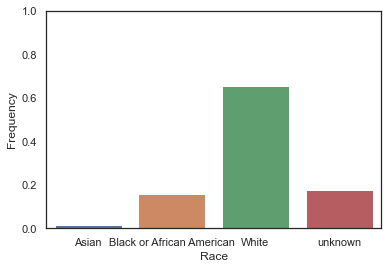

In [142]:
grouped_tp_data = post_hoc_tp.groupby("Race_posthoc").size().reset_index().rename(columns = {0: "Frequency"})
grouped_tp_data["Frequency"] = grouped_tp_data["Frequency"]/grouped_tp_data["Frequency"].sum()
plt.figure()
sns.barplot(data = grouped_tp_data, x = "Race_posthoc", y = "Frequency")
plt.xlabel("Race")
plt.ylabel("Frequency");
plt.ylim(0, 1)
plt.savefig("pls")

(0.0, 1.0)

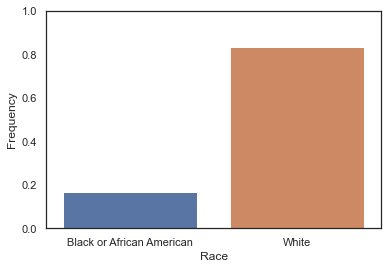

In [135]:
grouped_fn_data = post_hoc_fn.groupby("Race_posthoc").size().reset_index().rename(columns = {0: "Frequency"})
grouped_fn_data["Frequency"] = grouped_fn_data["Frequency"]/grouped_fn_data["Frequency"].sum()
sns.barplot(data = grouped_fn_data, x = "Race_posthoc", y = "Frequency")
plt.xlabel("Race")
plt.ylabel("Frequency");
plt.ylim(0, 1)

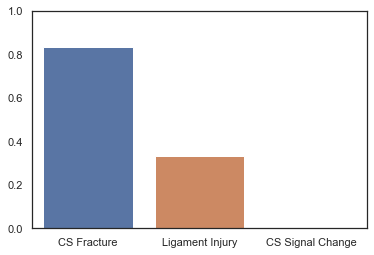

In [136]:
sns.barplot(x = ["CS Fracture", "Ligament Injury", "CS Signal Change"],
            y = post_hoc_fn[["CervicalSpineFractures_posthoc", "LigamentInjury_posthoc", 
                             "CervicalSpineSignalChange_posthoc"]].mean());
plt.ylim(0, 1);

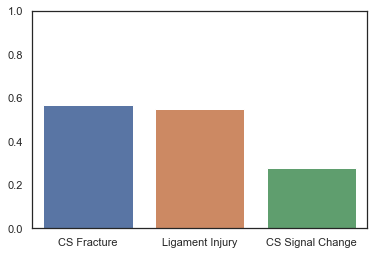

In [137]:
sns.barplot(x = ["CS Fracture", "Ligament Injury", "CS Signal Change"],
            y = post_hoc_tp[["CervicalSpineFractures_posthoc", "LigamentInjury_posthoc", 
                             "CervicalSpineSignalChange_posthoc"]].mean());
plt.ylim(0, 1);

In [91]:
post_hoc_fn[["CervicalSpineFractures_posthoc", "LigamentInjury_posthoc", 
                             "CervicalSpineSignalChange_posthoc"]].mean()

CervicalSpineFractures_posthoc       0.833333
LigamentInjury_posthoc               0.333333
CervicalSpineSignalChange_posthoc    0.000000
dtype: float64

In [117]:
post_hoc_fn

,,,,CervicalSpineFractures_posthoc,LigamentInjury_posthoc,CervicalSpineSignalChange_posthoc,Race_posthoc,PayorType_posthoc,OutcomeStudySite_posthoc,OutcomeStudySiteMobility_posthoc,OutcomeStudySiteNeuro_posthoc,outcome,classification
id,case_id,site,control_type,,,,,,,,,,
310290,310290,3,case,1.0,1.0,0.0,White,CI,Normal,N,NR,1.0,FN
710862,710862,7,case,1.0,1.0,0.0,White,CI,Normal,N,NR,1.0,FN
1312180,1312180,13,case,1.0,0.0,0.0,White,CI,Normal,N,NR,1.0,FN
1412380,1412380,14,case,0.0,0.0,0.0,White,CI,Normal,N,NR,1.0,FN
1412368,1412368,14,case,1.0,0.0,0.0,White,CI,Normal,N,NR,1.0,FN
1612780,1612780,16,case,1.0,0.0,0.0,Black or African American,CI,Normal,N,NR,1.0,FN
